In [1]:
from skimage.transform import iradon
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from tqdm import tqdm

PATH_TO_IMAGE =  '../data_store/2022-10-10_1433_testrecon/2022-10-10_1433_testrecon_result.tif'
PATH_TO_IMAGE =  '../data_store/2022-10-10_1433_testrecon/MMStack_Pos0.ome.tif'
im = io.imread(PATH_TO_IMAGE)
theta = np.linspace(0, 360, np.shape(im)[0], endpoint=False)

# Convert image stack to sinograms
# Want shape (length, width, angles)
sinogram = np.moveaxis(im, 0, -1)

%matplotlib inline

def plot_sinogram(sinogram, slice_number):
    # Display the sinogram for the first row of pixels
    plt.ylabel('Horizontal pixel coordinate')
    plt.xlabel('Image number')
    plt.imshow(sinogram[slice_number], cmap='gray')
    plt.title(f'Slice {slice_number}/{len(sinogram)}')
    plt.colorbar()
    plt.show()
    return

In [2]:
sinogram.shape

(1392, 1040, 400)

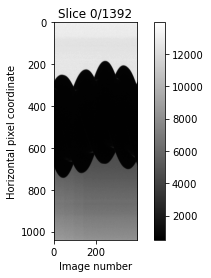

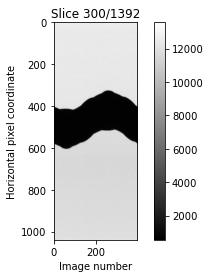

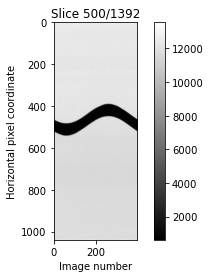

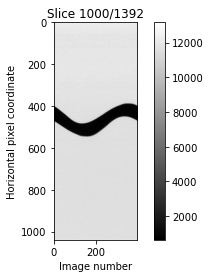

In [13]:
plot_sinogram(sinogram, 0)
plot_sinogram(sinogram, 300)
plot_sinogram(sinogram, 500)
plot_sinogram(sinogram, 1000)

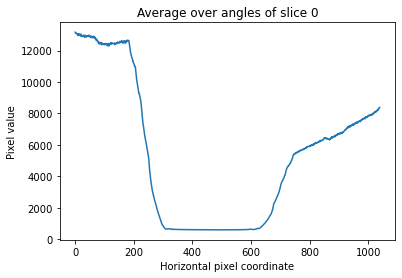

In [4]:
plt.plot(np.average(sinogram[0], axis=1))
plt.title('Average over angles of slice 0')
plt.xlabel('Horizontal pixel coordinate')
plt.ylabel('Pixel value')
plt.show()

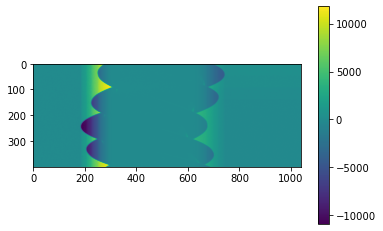

In [5]:
plt.imshow(sinogram[0].T - np.average(sinogram, axis=2)[0])
plt.colorbar()

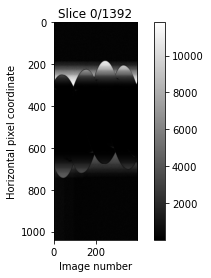

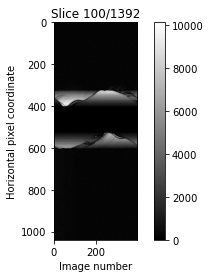

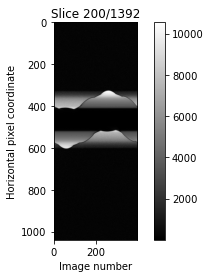

In [6]:
def remove_static(sinogram):
    subtracted = np.moveaxis(sinogram, 2,0) - np.average(sinogram, axis=2)
    return np.moveaxis(subtracted, 0, 2)

removed = remove_static(sinogram)
absolute = abs(removed)

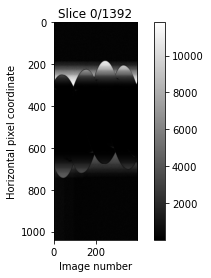

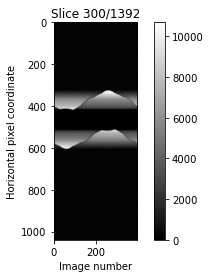

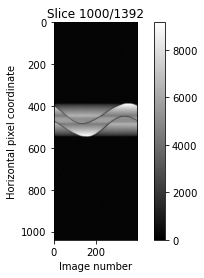

In [14]:
plot_sinogram(absolute, 0)
plot_sinogram(absolute, 300)
plot_sinogram(absolute, 1000)

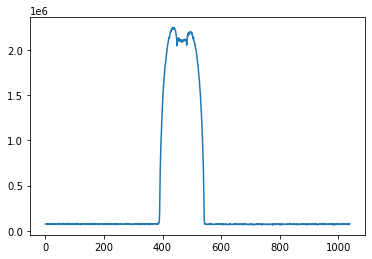

In [28]:
plt.plot(absolute[500].sum(axis=1))

In [8]:
width = sinogram.shape[1]

In [9]:
pixel_coords = np.arange(0,width)
func = absolute.sum(axis=2)
np.dot(func, pixel_coords)/ np.sum(func)

array([0.21989153, 0.22056181, 0.22133133, ..., 0.08348018, 0.08368935,
       0.08363979])

Text(0.5, 0, 'Vertical pixel coordinate (length)')

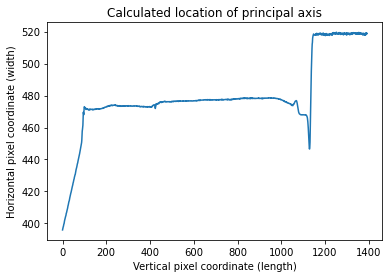

In [22]:
centre_estimates = func.dot(pixel_coords)/np.sum(func, axis=1)
plt.plot(centre_estimates)
plt.title('Calculated location of principal axis')
plt.ylabel('Horizontal pixel coordinate (width)')
plt.xlabel('Vertical pixel coordinate (length)')

In [40]:
thresholded = func.copy()
thresholded[func<1e5] = 0
thresholded[func>=1e5] = 1

/var/folders/55/y8nplzr92z3002w35fdrm2wc0000gn/T/ipykernel_71311/1632306662.py:1: RuntimeWarning: invalid value encountered in true_divide
  centre_estimates = thresholded.dot(pixel_coords)/np.sum(thresholded, axis=1)


(460.0, 467.0)

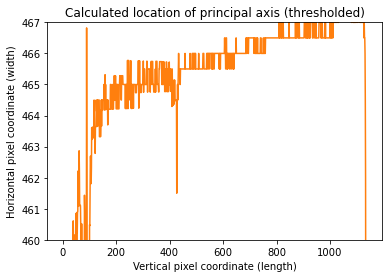

In [48]:
centre_estimates = thresholded.dot(pixel_coords)/np.sum(thresholded, axis=1)
plt.plot(centre_estimates, color='tab:orange')
plt.title('Calculated location of principal axis (thresholded)')
plt.ylabel('Horizontal pixel coordinate (width)')
plt.xlabel('Vertical pixel coordinate (length)')

plt.ylim(460,467)

In [38]:
print('Estimate with all of the data')
print(np.average(centre_estimates))
print('Estimate with start and finish truncated')
print(np.average(centre_estimates[200:1000]))

avg_estimate = np.average(centre_estimates[200:1000])

Estimate with all of the data
nan
Estimate with start and finish truncated
465.85670153548335


In [39]:
466*2

932

In [25]:
round(520- avg_estimate)

44